In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Henry\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
countries = ['United States', 'Canada']

df_DA_US = df[(df['job_country'].isin(countries)) & (df['job_title_short'] == 'Data Analyst')].copy()

In [9]:
df_DA_US = df_DA_US.dropna(subset=['salary_hour_avg'])

In [10]:
country_list = [df_DA_US[df_DA_US['job_country'] == country ] ['salary_hour_avg'] for country in countries]

C:\Users\Henry\AppData\Local\Temp\ipykernel_16168\534828444.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(country_list, labels=countries, vert=True)


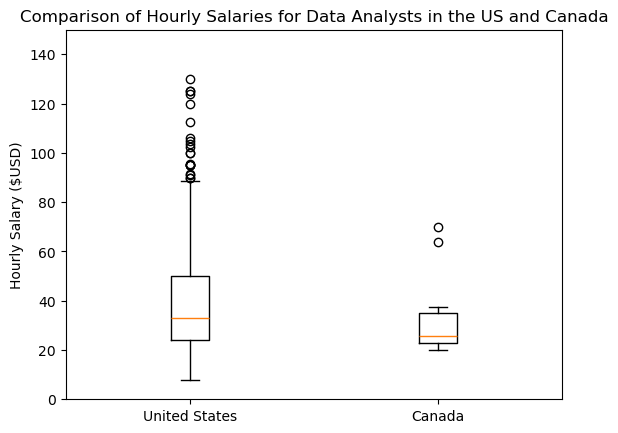

In [16]:
plt.boxplot(country_list, labels=countries, vert=True)
plt.ylim(0, 150)
plt.xlabel('')
plt.ylabel('Hourly Salary ($USD)')
plt.title('Comparison of Hourly Salaries for Data Analysts in the US and Canada')
plt.show()
